# Storytelling Data Visualization on Exchange Rates

In this project we want to apply some of our new data visualisation skills to a dataset containing the exchange rates between the US Dollar and the Euro. 

Daria Chemkaeva put together the data set of exchange rates of the Euro against many other currencies and made it available on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020?resource=download) — the data source is the European Central Bank. Note that the dataset gets regular updates — this version is from January 2021.

## Reading in the data and inspecting it

Let's start by reading in the dataset and inspecting it. 

In [1]:
# import the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline 

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

print(exchange_rates.head())
print('\n')
print(exchange_rates.tail())
print('\n')
print(exchange_rates.info())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

The dataset has 5699 rows and 41 columns. The newest entries  areat the top of the list, the oldest at the bottom. Most of the columns are in string format and need to be recast into float. Note that we have missing data for the Bulgarian currency in earlier years. We also need to bring the date colum into a usable format. 

## Data cleaning and preparation

Below, we do the following:

* We rename the [US dollar ] and Period\Unit: columns to something easier to type — US_dollar and Time.
* We change the Time column to a datetime data type.
* We sort the values by Time in ascending order.
* We reset the index (and drop the initial index).


In [2]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

We isolate `Time`and `US_dollar` into a seperate dataframe, since we want to focus on the exchange rate between Euro and US Dollars.

In [3]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
print(euro_to_dollar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5699 non-null   datetime64[ns]
 1   US_dollar  5699 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 89.2+ KB
None


In [4]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1193     6
          ..
1.4886     1
0.8524     1
0.9583     1
0.9293     1
1.2903     1
Name: US_dollar, Length: 3528, dtype: int64

There are 62 cases where a missing value of the exchange rate is indicated by a `-`. We drop these rows.

In [5]:
euro_to_dollar = euro_to_dollar[~euro_to_dollar['US_dollar'].str.contains("-")]

In [6]:
euro_to_dollar['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.0867    6
1.0888    6
         ..
0.8524    1
0.9583    1
0.9293    1
1.0871    1
1.2903    1
Name: US_dollar, Length: 3527, dtype: int64

In [7]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

## A first visual exploaration of the exchange rate

Here is a first plot to get acquainted with the evolution of the Euro to Dollar exchange rate over time

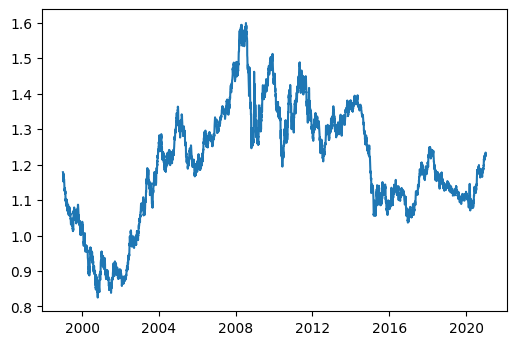

In [8]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

In order to focus more on the long-term trend of the exchange rate, it's useful to apply the rolling mean to the time series. Here we choose a rolling mean with a time window of 30 days.

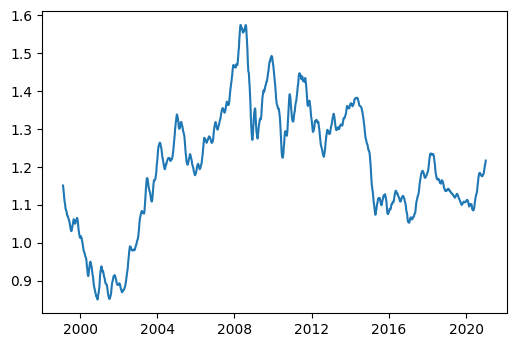

In [9]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.show()


## Developing a story to tell: the pluge of the exchange rate in 2015

The chart offers several interesting avenues to explore. One particular development is [the plunge](https://www.bbc.com/news/business-31833200) of the exchange rate of the Euro against the US Dollar in March 2015. Telling this story, by showing the development in the preceding 2 years (2013 - 2015) and the following 3 years (2015 - 2018) could be interesting. It seems that this development had been caused by the Eruopean Central Bank' so-called [Quantitative Easing](https://www.ecb.europa.eu/ecb-and-you/explainers/tell-me-more/html/app.en.html) program, which was initiated in 2015. The goal of Quantitative Easing (QE) is to increase the inflation rate of a country when it is too low. A too low inflation rate is a sign of too little economic demand, i.e. it indicates a [weak economy](https://econofact.org/whats-the-problem-with-low-inflation). QE means that the European Central Bank (ECB) buys private assets and bonds and floods the market with Euros. This is done in situations where interest rates cannot be reduced further. Essentially, lending by banks is being encouraged and investors might use their money to invest in other currencies, which brings the exchange rate down. In the process, inflation increases and "kick-starts" the economy. The program was running until the end of 2018, that's why we look at this time window.

## Selecting the right time window and plotting the rolling mean

For our analysis we are interested in the time before the drop and the time after the drop. We choose the previous 2 and the following 3 years, i.e. over all the years from 2013 until end of 2018. We assign this selection to the dataframe `selection`, calculate the rolling mean again (30 day window) and plot a simple graph.

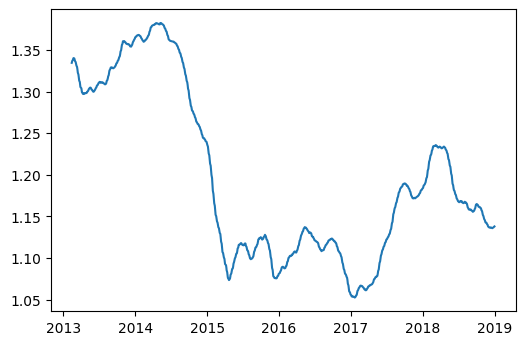

In [10]:
selection = euro_to_dollar[(euro_to_dollar['Time'] >= '2013-01-01') & (euro_to_dollar['Time'] <= '2018-12-31')]

# re-calculating the rolling mean on the selection dataframe and plotting it
selection = selection.copy()
selection['rolling_mean'] = selection['US_dollar'].rolling(30).mean()

plt.plot(selection['Time'],
         selection['rolling_mean'])
plt.show()

We will observe 3 time periods:

* Period 1: 01/2013 - 02/2015 (Before Quantitative Easing)
* Period 2: 03/2015 - 02/2017 (Middle period, QE started in 03/2015)
* Period 3: 03/2017 - 12/2018 (Last QE period, end of QE in 12/2018)

For these 3 periods we will make 3 plots, highlighting each section.
We will show a 'progress bar' in the middle of each plot, which will relate the inflation rate of the time period to the target inflation rate of 2%. (The policy goal was to reach that target rate.)
The exchange rates should reflect the QE policy, as a high exchange rate of EUR vs USD implies a weaker Euro. (This might have been intended, since it could potentially boost exports to the US.) The data for this progress barcomes from [Eurostat](https://ec.europa.eu/eurostat/databrowser/view/prc_hicp_midx__custom_12415634/default/table?lang=en).

## Building the plot 

## Grid chart

We start by plotting the three plots first as a grid chart. We will also remove the  tick labels on the x- and y-axis in this step, since we want to reintroduce this information later along the different sections.

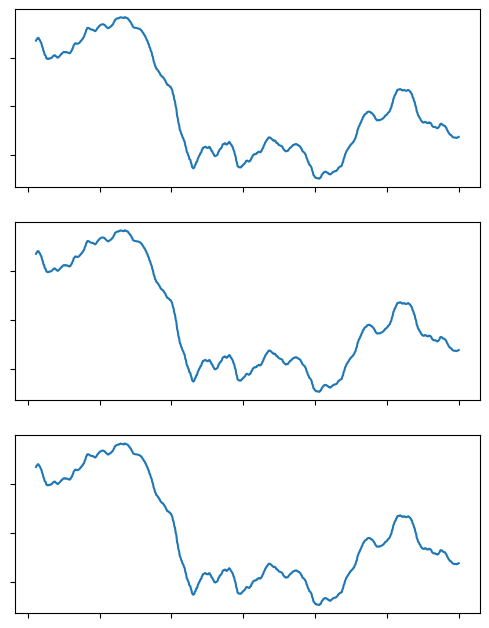

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, # 1 Figure, 3 Axis objects
                                         figsize=(6,8))
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.plot(selection['Time'], selection['rolling_mean'])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()

## Removing ticks and spines

As we want to maximise the "data-ink", we remove unnecessary design elements. In this step we remove the ticks and spines.


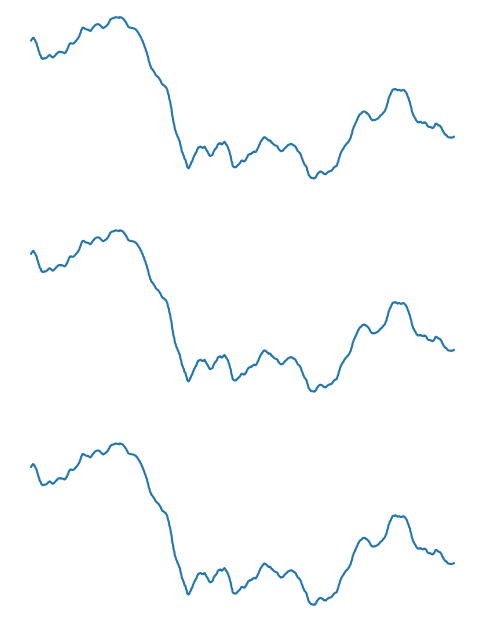

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.plot(selection['Time'], selection['rolling_mean'])
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    ax.tick_params(bottom=False, left=False)
    
plt.show()

## Shaded lineplot and highlighting periods

We want to achieve two things with the next lines of code.

1. Change the colour to red and make the line plot in each grid slightly transparent (acting as a background trend)
2. Highlight 3 time periods of interest

Therefore, in the first code section, we define the time periods of interest so that they can be passed on to the grid chart.
Within the plotting commands, we include the shading and the colour changes.

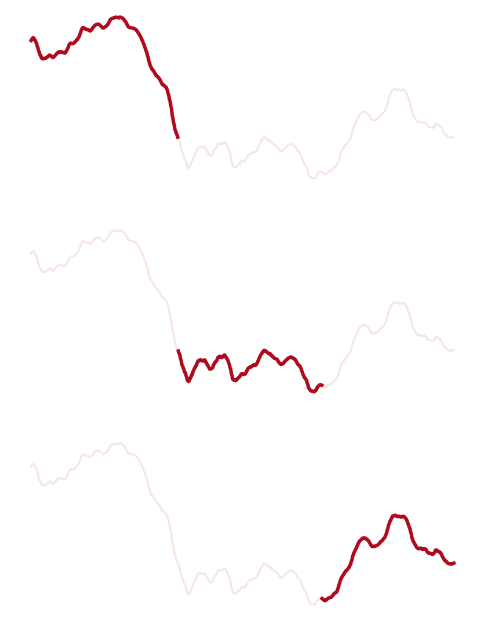

In [13]:
# selecting time periods for the highlights

period1 = selection[(selection['Time'] >= '2013-01-01') & (selection['Time'] <= '2015-02-28')]
period2 = selection[(selection['Time'] >= '2015-03-01') & (selection['Time'] <= '2017-02-28')]
period3 = selection[(selection['Time'] >= '2017-03-01') & (selection['Time'] <= '2018-12-31')]

# plotting grid chart with highlights

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.plot(selection['Time'], selection['rolling_mean'],
            color='#af0b1e', alpha=0.1)  # red shading, transparency

for ax, period in zip(axes, [period1, period2, period3]):
    ax.plot(period['Time'], period['rolling_mean'], color='#af0b1e', linewidth=2.5)
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    ax.tick_params(bottom=False, left=False)

plt.show()

## Adding explanatory labels along the plot

We will show a few orientation points. First, we will show the exchange rate (rolling mean) at the beginning of the first period (1.34), then the maximum of the overall observation window (1.38). This is followed by the mimimum of the series, which happens at the end of period 2 (1.05). Finally, we als show the exchange rate at the very end of the observation window. These 4 points should be enough to give orientation about the value range within our observation window. We all display this information as slightly shaded in the first of the three grid charts. The code below shows how we get the information about these 4 points.

In [14]:
# find start point, maximum in 1. period, minimum in 2. period, end point

print(period1['rolling_mean'][30:35]) # 1.34 at beginning of period
print(period1['rolling_mean'].max()) # 1.38 maximum of series
period2_min_value = period2['rolling_mean'].min() 
print(period2_min_value) # 1.05 minimum of series
period2_min_date = selection.loc[selection['rolling_mean'] == period2_min_value, 'Time'].iloc[0] # 20 Jan 2017
print(period2_min_date)
print(period3['rolling_mean'].tail) # 1.18 at end of period

3679    1.335180
3680    1.335930
3681    1.336973
3682    1.338017
3683    1.338893
Name: rolling_mean, dtype: float64
1.38232
1.052496666666668
2017-01-20 00:00:00
<bound method NDFrame.tail of 4714    1.065527
4715    1.065013
4716    1.064790
4717    1.064380
4718    1.063807
          ...   
5177    1.136057
5178    1.136533
5179    1.136920
5180    1.137447
5181    1.137930
Name: rolling_mean, Length: 468, dtype: float64>


We also need to gibe some information about the time periods that we aare highlighting. This information is displayed in each subplot, close to the highlighted line plot. We print it in bold, and the rotation indicates the overall trend in the time period that is shown. In the first period, we tilt it downwards, since the exchange rates are dropping from a high level. In the second period, the rates are just fluctuating, so the label is horizontal. In the last period the rates are increasing, so the label has an upward tilt. This is what it looks like:

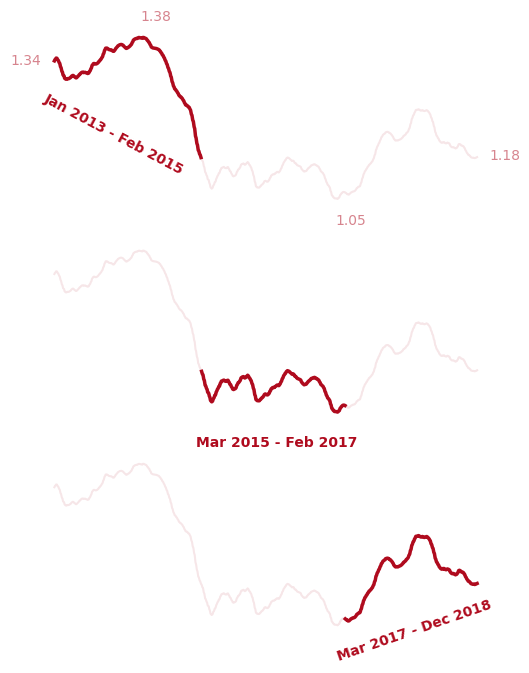

In [15]:
# Adding labels and descriptions

# plot setup and actual plotting
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.plot(selection['Time'], selection['rolling_mean'],
            color='#af0b1e', alpha=0.1)  # red shading, transparency

for ax, period in zip(axes, [period1, period2, period3]):
    ax.plot(period['Time'], period['rolling_mean'], color='#af0b1e', linewidth=2.5)
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    ax.tick_params(bottom=False, left=False)

# added text and exchange rate labels
ax1.text(-0.05, 0.8, '1.34', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds labels for start of period1
ax1.text(0.23, 1.05, '1.38', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds labels for maximum value
ax1.text(0.65, -0.1, '1.05', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds label for minimum value
ax1.text(0.98, 0.27, '1.18', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds label for last value in series

# period descriptions along the line plot
ax1.text(0.018, 0.19, 'Jan 2013 - Feb 2015', color='#af0b1e',
         weight='bold', rotation=-28, transform=ax1.transAxes)  # adds the period1 description, downwards rotated
ax2.text(0.35, -0.15, 'Mar 2015 - Feb 2017', color='#af0b1e',
         weight='bold', transform=ax2.transAxes)  # adds the period2 description
ax3.text(0.65, -0.15, 'Mar 2017 - Dec 2018', color='#af0b1e',
         weight='bold', rotation=19, transform=ax3.transAxes)  # dds the period3 description, upwards rotated

plt.show()

# Note: The layout in the Jupyter Notebook and on the local machine look different. The labels are not in the same positions.
# This code is optimised for showing the plot in this Jupyter Notebook.


## Adding title and subtitle

It's important that the main message is revealed in the title and that the subtitle give the necessary context information about the data being shown.

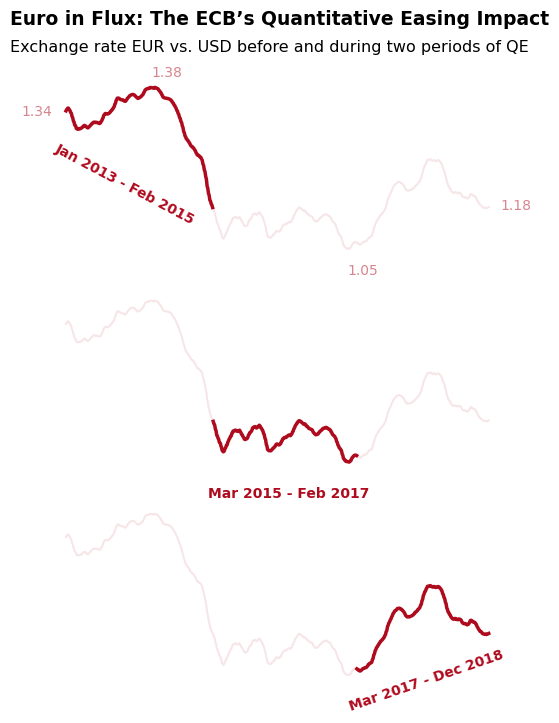

In [16]:
# Adding title and subtitle

# plot setup and actual plotting
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.plot(selection['Time'], selection['rolling_mean'],
            color='#af0b1e', alpha=0.1)  # red shading, transparency

for ax, period in zip(axes, [period1, period2, period3]):
    ax.plot(period['Time'], period['rolling_mean'], color='#af0b1e', linewidth=2.5)
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    ax.tick_params(bottom=False, left=False)

# added text and exchange rate labels
ax1.text(-0.05, 0.8, '1.34', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds labels for start of period1
ax1.text(0.23, 1.02, '1.38', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds labels for maximum value
ax1.text(0.65, -0.1, '1.05', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds label for minimum value
ax1.text(0.98, 0.27, '1.18', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds label for last value in series

# period descriptions along the line plot
ax1.text(0.018, 0.19, 'Jan 2013 - Feb 2015', color='#af0b1e',
         weight='bold', rotation=-28, transform=ax1.transAxes)  # adds the period1 description, downwards rotated
ax2.text(0.35, -0.15, 'Mar 2015 - Feb 2017', color='#af0b1e',
         weight='bold', transform=ax2.transAxes)  # adds the period2 description
ax3.text(0.65, -0.15, 'Mar 2017 - Dec 2018', color='#af0b1e',
         weight='bold', rotation=19, transform=ax3.transAxes)  # dds the period3 description, upwards rotated

# title and subtitle
ax1.text(-0.075, 1.31, 'Euro in Flux: The ECB’s Quantitative Easing Impact', size=13.5,
         weight='bold', transform=ax1.transAxes)  # Title parameters
ax1.text(-0.075, 1.16, 'Exchange rate EUR vs. USD before and during two periods of QE', size=11.5, transform=ax1.transAxes)  # Subtitle parameters

plt.show()

## Adding the relative inflation rate as a 'progress bar'

The polic goal of the Quantitative Easing programme was to reach the target inflation rate of 2 % (price increase relative to the previous year). We can show for each of the periods how far away the average inflation rate in that period was from the target. We will include this information as a 'progress bar', which is filled more, the closer the current rate is to the target rate. We will pu this bar in the middle of each plot. The data comes from [Eurostat](https://ec.europa.eu/eurostat/databrowser/view/prc_hicp_midx__custom_12415634/default/table?lang=en). I have calculated the average inflation rate in each period outside of this presentation and will plug those results in.

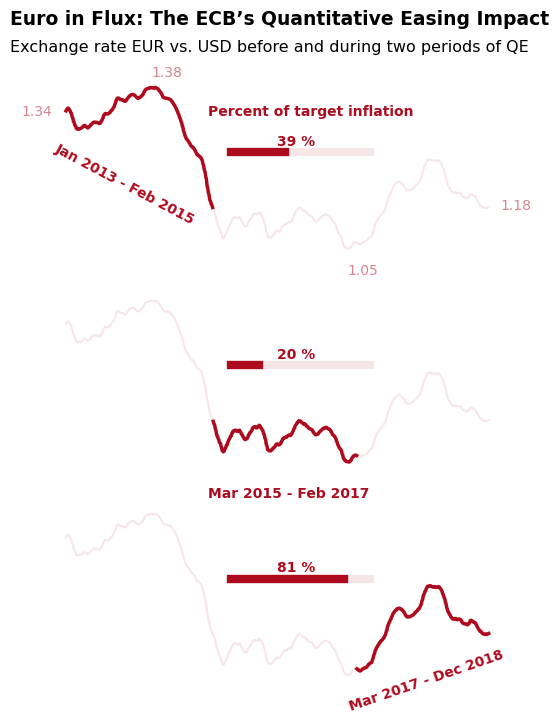

In [17]:
# Adding a progress bar

# inflation data needed for progress bars
inflation = [0.787472334, 0.403875503, 1.628635] # avg. inflation rates in month sections
proportions = [round(rate/2, 2) for rate in inflation] # calculate proportion relative to the 2% target
xmax_vals = [round(0.40 + proportion * 0.3, 3) for proportion in proportions] # filling the proportion; 0.5 is where the horizontal line starts. Then it fills the proportion of the total length (xmax 0.8 - xmin 0.5 =0.3)

# plot setup and actual plotting
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.plot(selection['Time'], selection['rolling_mean'],
            color='#af0b1e', alpha=0.1)  # red shading, transparency

for ax, period in zip(axes, [period1, period2, period3]):
    ax.plot(period['Time'], period['rolling_mean'], color='#af0b1e', linewidth=2.5)
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    ax.tick_params(bottom=False, left=False)

# progress bar
for ax, xmax, proportion in zip(axes, xmax_vals, proportions):
    ax.axhline(y=1.25, xmin=0.40, xmax=0.7,
               linewidth=6, color='#af0b1e',
               alpha=0.1)  # background box
    ax.axhline(y=1.25, xmin=0.40, xmax=xmax,
               linewidth=6, color='#af0b1e')  # progress based on the parameters above
    ax.text(0.50, 0.63, f"{int(proportion * 100)} %", 
            color='#af0b1e', weight='bold', transform=ax.transAxes)

# added text and exchange rate labels
ax1.text(0.35, 0.80, 'Percent of target inflation', color='#af0b1e',
             weight='bold', transform=ax1.transAxes)
ax1.text(-0.05, 0.8, '1.34', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds labels for start of period1
ax1.text(0.23, 1.02, '1.38', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds labels for maximum value
ax1.text(0.65, -0.1, '1.05', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds label for minimum value
ax1.text(0.98, 0.27, '1.18', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds label for last value in series

# period descriptions along the line plot
ax1.text(0.018, 0.19, 'Jan 2013 - Feb 2015', color='#af0b1e',
         weight='bold', rotation=-28, transform=ax1.transAxes)  # adds the period1 description, downwards rotated
ax2.text(0.35, -0.15, 'Mar 2015 - Feb 2017', color='#af0b1e',
         weight='bold', transform=ax2.transAxes)  # adds the period2 description
ax3.text(0.65, -0.15, 'Mar 2017 - Dec 2018', color='#af0b1e',
         weight='bold', rotation=19, transform=ax3.transAxes)  # dds the period3 description, upwards rotated

# title and subtitle
ax1.text(-0.075, 1.31, 'Euro in Flux: The ECB’s Quantitative Easing Impact', size=13.5,
         weight='bold', transform=ax1.transAxes)  # Title parameters
ax1.text(-0.075, 1.16, 'Exchange rate EUR vs. USD before and during two periods of QE', size=11.5, transform=ax1.transAxes)  # Subtitle parameters

plt.show()

## Mark the time periods with a grey background box and label

We are close to finishing this plot. But it could help to add a slight grey background for each period so that each period can additionally be labelled. The reader then will more clearly see which three periods (before QE, 1st QE period, 2nd QE period) are shown.

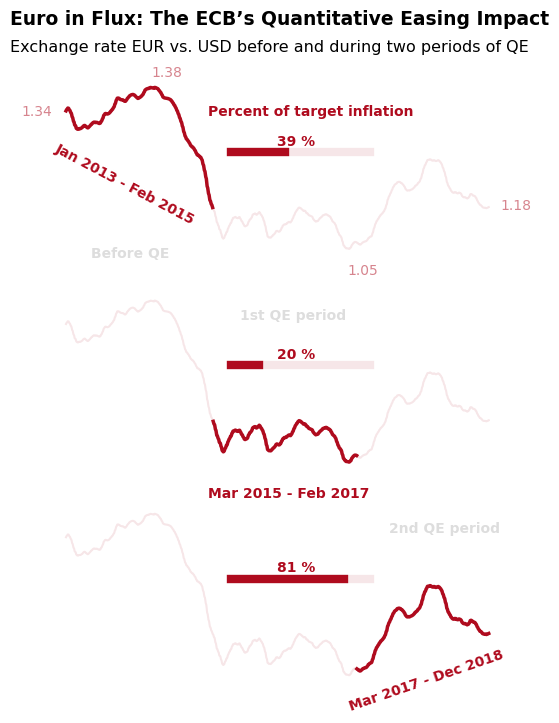

In [18]:
# Adding period descriptions (background)

# inflation data needed for progress bars
inflation = [0.787472334, 0.403875503, 1.628635] # avg. inflation rates in month sections
proportions = [round(rate/2, 2) for rate in inflation] # calculate proportion relative to the 2% target
xmax_vals = [round(0.40 + proportion * 0.3, 3) for proportion in proportions] # filling the proportion; 0.5 is where the horizontal line starts. Then it fills the proportion of the total length (xmax 0.8 - xmin 0.5 =0.3)

# plot setup and actual plotting
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.plot(selection['Time'], selection['rolling_mean'],
            color='#af0b1e', alpha=0.1)  # red shading, transparency

for ax, period in zip(axes, [period1, period2, period3]):
    ax.plot(period['Time'], period['rolling_mean'], color='#af0b1e', linewidth=2.5)
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    ax.tick_params(bottom=False, left=False)
    
# progress bar
for ax, xmax, proportion in zip(axes, xmax_vals, proportions): # progress bar
    ax.axhline(y=1.25, xmin=0.40, xmax=0.7,
               linewidth=6, color='#af0b1e',
               alpha=0.1)  # background box
    ax.axhline(y=1.25, xmin=0.40, xmax=xmax,
               linewidth=6, color='#af0b1e')  # progress based on the parameters above
    ax.text(0.50, 0.63, f"{int(proportion * 100)} %", 
            color='#af0b1e', weight='bold', transform=ax.transAxes)

# added text and exchange rate labels
ax1.text(0.35, 0.80, 'Percent of target inflation', color='#af0b1e',
             weight='bold', transform=ax1.transAxes)
ax1.text(-0.05, 0.8, '1.34', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds labels for start of period1
ax1.text(0.23, 1.02, '1.38', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds labels for maximum value
ax1.text(0.65, -0.1, '1.05', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds label for minimum value
ax1.text(0.98, 0.27, '1.18', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds label for last value in series

# period descriptions along the line plot
ax1.text(0.018, 0.19, 'Jan 2013 - Feb 2015', color='#af0b1e',
         weight='bold', rotation=-28, transform=ax1.transAxes)  # adds the period1 description, downwards rotated
ax2.text(0.35, -0.15, 'Mar 2015 - Feb 2017', color='#af0b1e',
         weight='bold', transform=ax2.transAxes)  # adds the period2 description
ax3.text(0.65, -0.15, 'Mar 2017 - Dec 2018', color='#af0b1e',
         weight='bold', rotation=19, transform=ax3.transAxes)  # dds the period3 description, upwards rotated

# adding a description of each period in grey and transparent
ax1.text(0.10, 0, 'Before QE', color='#bcbcbc', alpha=0.5,
             weight='bold', transform=ax1.transAxes)
ax2.text(0.42, 0.85, '1st QE period', color='#bcbcbc', alpha=0.5,
             weight='bold', transform=ax2.transAxes)
ax3.text(0.74, 0.85, '2nd QE period', color='#bcbcbc', alpha=0.5,
             weight='bold', transform=ax3.transAxes)

# title and subtitle
ax1.text(-0.075, 1.31, 'Euro in Flux: The ECB’s Quantitative Easing Impact', size=13.5,
         weight='bold', transform=ax1.transAxes)  # Title parameters
ax1.text(-0.075, 1.16, 'Exchange rate EUR vs. USD before and during two periods of QE', size=11.5, transform=ax1.transAxes)  # Subtitle parameters

plt.show()

## Adding a signature

In a last step we want to add a signature that shows the creator of this plot and the relevant sources that were used. I add a aignature bar in dark grey at the very bottom of the last grid chart. The font colour is the same as the background of the rest of the graph.

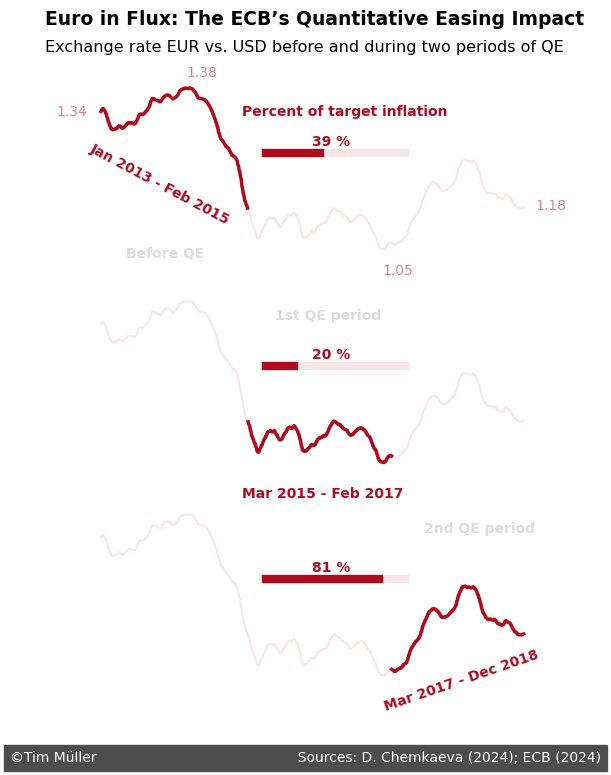

In [19]:
# Adding a signature

# inflation data needed for progress bars
inflation = [0.787472334, 0.403875503, 1.628635] # avg. inflation rates in month sections
proportions = [round(rate/2, 2) for rate in inflation] # calculate proportion relative to the 2% target
xmax_vals = [round(0.40 + proportion * 0.3, 3) for proportion in proportions] # filling the proportion; 0.5 is where the horizontal line starts. Then it fills the proportion of the total length (xmax 0.8 - xmin 0.5 =0.3)

# plot setup and actual plotting
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.plot(selection['Time'], selection['rolling_mean'],
            color='#af0b1e', alpha=0.1)  # red shading, transparency

for ax, period in zip(axes, [period1, period2, period3]):
    ax.plot(period['Time'], period['rolling_mean'], color='#af0b1e', linewidth=2.5)
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    ax.tick_params(bottom=False, left=False)
    
# progress bar
for ax, xmax, proportion in zip(axes, xmax_vals, proportions): # progress bar
    ax.axhline(y=1.25, xmin=0.40, xmax=0.7,
               linewidth=6, color='#af0b1e',
               alpha=0.1)  # background box
    ax.axhline(y=1.25, xmin=0.40, xmax=xmax,
               linewidth=6, color='#af0b1e')  # progress based on the parameters above
    ax.text(0.50, 0.63, f"{int(proportion * 100)} %", 
            color='#af0b1e', weight='bold', transform=ax.transAxes)

# added text and exchange rate labels
ax1.text(0.35, 0.80, 'Percent of target inflation', color='#af0b1e',
             weight='bold', transform=ax1.transAxes)
ax1.text(-0.05, 0.8, '1.34', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds labels for start of period1
ax1.text(0.23, 1.02, '1.38', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds labels for maximum value
ax1.text(0.65, -0.1, '1.05', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds label for minimum value
ax1.text(0.98, 0.27, '1.18', color='#af0b1e', alpha=0.5,  transform=ax1.transAxes)  # adds label for last value in series

# period descriptions along the line plot
ax1.text(0.018, 0.19, 'Jan 2013 - Feb 2015', color='#af0b1e',
         weight='bold', rotation=-28, transform=ax1.transAxes)  # adds the period1 description, downwards rotated
ax2.text(0.35, -0.15, 'Mar 2015 - Feb 2017', color='#af0b1e',
         weight='bold', transform=ax2.transAxes)  # adds the period2 description
ax3.text(0.65, -0.15, 'Mar 2017 - Dec 2018', color='#af0b1e',
         weight='bold', rotation=19, transform=ax3.transAxes)  # dds the period3 description, upwards rotated

# adding a description of each period in grey and transparent
ax1.text(0.10, 0, 'Before QE', color='#bcbcbc', alpha=0.5,
             weight='bold', transform=ax1.transAxes)
ax2.text(0.42, 0.85, '1st QE period', color='#bcbcbc', alpha=0.5,
             weight='bold', transform=ax2.transAxes)
ax3.text(0.74, 0.85, '2nd QE period', color='#bcbcbc', alpha=0.5,
             weight='bold', transform=ax3.transAxes)

# title and subtitle
ax1.text(-0.075, 1.31, 'Euro in Flux: The ECB’s Quantitative Easing Impact', size=13.5,
         weight='bold', transform=ax1.transAxes)  # Title parameters
ax1.text(-0.075, 1.16, 'Exchange rate EUR vs. USD before and during two periods of QE', size=11.5, transform=ax1.transAxes)  # Subtitle parameters

# signature
ax3.text(-0.15, -0.44, '©Tim Müller' + ' ' * 46 + 'Sources: D. Chemkaeva (2024); ECB (2024)',
        color='#ffffff', backgroundcolor='#4d4d4d', size=10,
         transform=ax3.transAxes)

plt.show()

## Conclusion

The final plot shows our data story. We follow the development of the Euro/US-Dollar exchange rate over time, starting in 2013 (before Quantitative Easing), observing a strong drop in that first period. We then see highlight the second period (March 2015 until Februaary 2017), which is the first Quantitative Easing period initiated by the European Central Bank. We finally see an increase of the EUR/USD rate in the third period, indicating that QE seemed to have the desired effects, i.e. increasing the inflation level in the Eurozone to a target level of 2 %. The development over time is represented by showing three subplots and highlighting different time periods.

In order to strenghten the link to the inflation policy goal, we added a progress bar in the centre of the plot, which compares the observed average inflation levels in a given period to the target level.

Throughout the plot building process we tried to increase the "data-ink-ratio" and to use design elemnts sparsely. This is why we only show few data labels and try to use each element to add further information. The labels along the line plot elements, for example, are oriented in such a way as to show the trend of the line plot.

The main message - exchange rates were affected in the context of QE - and the relevant information are shown in the title and subtitle. Finally we added a signature, containgin the creator of the data story and the relevant sources.